In [1]:
%matplotlib inline

In [2]:
import torch
import wandb
import matplotlib.pyplot as plt
from warnings import warn
import pandas as pd


def sweep_dataframe(sweep_id):
    api = wandb.Api()

    # Project is specified by <entity/project-name>
    sweep = api.sweep(sweep_id)
    num_runs = len(sweep.runs)

    epoch_times = []
    num_graphs = []

    for run in sweep.runs:
        df = run.history()
        if "train/self_time" not in df.keys():
            warn(f"Skipping crashed run\n{run.config} ")
            continue

        et = df["train/self_time"]
        et = et[~et.isnull()].reset_index(drop=True)
        name = f"{run.config['model_params.num_features']}, {run.config['model_params.num_interactions']}"
        et = et.rename(name)
        epoch_times.append(et)
        num_graphs.append(run.summary.get("num_processed"))

    df = pd.concat(epoch_times, axis=1)
    mean_time = df.mean().rename("mean_time (s)")

    return df, mean_time

## QM9

In [3]:
df, mean_time = sweep_dataframe("hatemh/qm9-model-arch/sweeps/v074y4kh")
df

,"512, 6","512, 4","512, 2","256, 6","256, 4","256, 2","128, 6","128, 4","128, 2","64, 6","64, 4","64, 2"
0,2.166413,1.488536,0.847346,1.177678,0.853399,0.547984,0.822500,0.614619,0.781120,0.881849,0.565627,0.635676
1,2.881367,2.166622,1.541133,1.862113,1.544180,1.263612,1.504718,1.296485,1.507833,1.341157,1.251894,1.438917
2,2.792210,2.286182,1.601430,1.849176,1.591658,1.321086,1.618214,1.349308,1.571899,1.474965,1.448731,1.556209
3,2.936277,2.071856,1.615439,1.969927,1.428238,1.261638,1.483808,1.327410,1.529384,1.593394,1.262469,1.399781
4,2.804904,2.125657,1.548905,1.864688,1.446779,1.259932,1.543440,1.236436,1.417703,1.559419,1.278864,1.327341
5,3.006151,2.314912,1.649229,2.093917,1.648609,1.443755,1.697503,1.425501,1.371403,1.722930,1.504540,1.313704
6,2.795053,2.089790,1.498702,1.887142,1.448794,1.230794,1.504207,1.214513,1.214929,1.585059,1.284164,1.138614
7,2.808034,2.139775,1.552843,1.857427,1.498791,1.240378,1.520710,1.220034,1.121363,1.557446,1.258766,1.143064
8,2.987275,2.367960,1.698088,1.955969,1.602522,1.348499,1.640503,1.397270,1.256438,1.647565,1.424008,1.327656
9,2.792981,2.092590,1.616790,1.849801,1.585148,1.305350,1.599564,1.392576,1.314678,1.623762,1.270397,1.235313


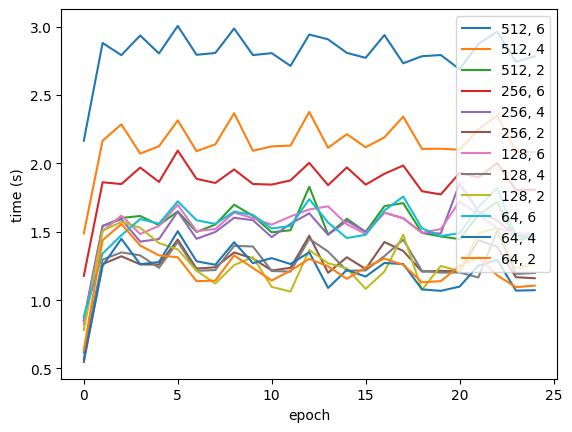

In [4]:
df.plot()
plt.xlabel("epoch")
plt.ylabel("time (s)");

In [5]:
mean_time

512, 6    2.809140
512, 4    2.153601
512, 2    1.545067
256, 6    1.866998
256, 4    1.523968
256, 2    1.258592
128, 6    1.543444
128, 4    1.263207
128, 2    1.277596
64, 6     1.544657
64, 4     1.216980
64, 2     1.223934
Name: mean_time (s), dtype: float64

## HydroNet Small (500k)

In [6]:
df, mean_time = sweep_dataframe("hatemh/hydronet-small-model-arch/sweeps/vvvlo9ya")
df

/tmp/ipykernel_13281/2766317389.py:20: UserWarning: Skipping crashed run
{'k': 28, 'seed': 0, 'task': 'Task.train', 'cutoff': 6, 'module': 'BenchModule.schnet_fss', 'dataset': 'BenchDataset.hydronet_small', 'use_wandb': True, 'batch_size': 10, 'num_epochs': 25, 'max_workers': 29, 'profile_dir': None, 'use_packing': True, 'model_params': 'ModelParams(num_features=512, num_interactions=6, num_gaussians=25, cutoff=6.0)', 'num_features': 512, 'num_io_tiles': 0, 'learning_rate': 0.001, 'num_gaussians': 25, 'combined_batch': 'CombinedBatch(model_batch_size=2, device_iterations=4, replication_factor=16, gradient_accumulation=64)', 'prefetch_depth': 3, 'synthetic_data': False, 'merge_all_reduce': True, 'num_interactions': 6, 'use_async_loader': True, 'model_params.num_features': 512, 'available_memory_proportion': None, 'model_params.num_interactions': 6} 
  warn(f"Skipping crashed run\n{run.config} ")
/tmp/ipykernel_13281/2766317389.py:20: UserWarning: Skipping crashed run
{'k': 28, 'seed': 0

,"256, 6","256, 4","256, 2","128, 6","128, 4","128, 2","64, 6","64, 4","64, 2"
0,9.679749,6.741313,3.773186,5.084905,3.660294,3.553593,3.553657,2.881853,2.725346
1,14.049626,11.043257,7.897968,9.284505,7.750385,8.072720,7.721214,7.450969,6.915066
2,13.458625,10.508335,7.221409,8.689125,7.060712,7.468584,6.999647,6.999493,6.396561
3,14.035029,11.100129,7.909336,9.364265,7.831846,7.528213,7.789039,7.848219,7.321190
4,14.210942,11.098399,7.923857,9.578876,7.949771,7.826106,7.731755,7.690277,7.101890
5,13.367294,10.344913,7.254265,8.648122,7.052068,6.996842,6.971775,7.454097,6.517234
6,14.251017,11.113431,7.972143,9.479072,7.929052,8.064693,7.824609,7.607890,7.210140
7,13.364979,10.312804,7.111924,8.607126,7.128049,7.022944,7.117908,7.536214,6.194899
8,14.261904,11.194008,7.959411,9.464615,8.011074,8.060268,8.003188,7.595494,7.205142
9,13.393861,10.302804,7.049478,8.565477,7.043274,6.191263,7.001520,6.800635,6.298569


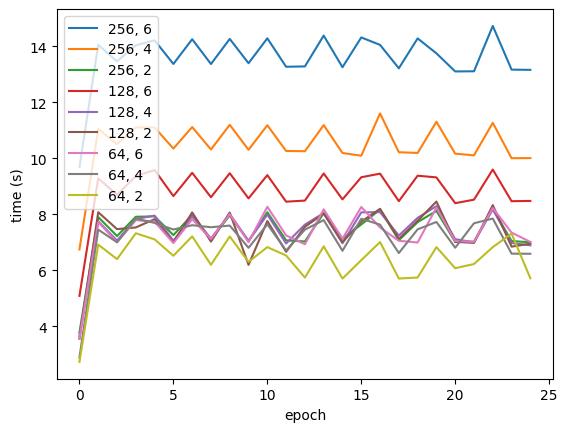

In [7]:
df.plot()
plt.xlabel("epoch")
plt.ylabel("time (s)");

In [8]:
mean_time

256, 6    13.575634
256, 4    10.470293
256, 2     7.375467
128, 6     8.818787
128, 4     7.387071
128, 2     7.326077
64, 6      7.326271
64, 4      7.156801
64, 2      6.372280
Name: mean_time (s), dtype: float64

## HydroNet Medium (2.7m)

In [9]:
df, mean_time = sweep_dataframe("hatemh/hydronet-medium-model-arch/sweeps/51wluue4")
df

/tmp/ipykernel_13281/2766317389.py:20: UserWarning: Skipping crashed run
{'k': 28, 'seed': 0, 'task': 'Task.train', 'cutoff': 6, 'module': 'BenchModule.schnet_fss', 'dataset': 'BenchDataset.hydronet_medium', 'use_wandb': True, 'batch_size': 10, 'num_epochs': 25, 'max_workers': 29, 'profile_dir': None, 'use_packing': True, 'model_params': 'ModelParams(num_features=512, num_interactions=6, num_gaussians=25, cutoff=6.0)', 'num_features': 512, 'num_io_tiles': 0, 'learning_rate': 0.001, 'num_gaussians': 25, 'combined_batch': 'CombinedBatch(model_batch_size=2, device_iterations=4, replication_factor=16, gradient_accumulation=64)', 'prefetch_depth': 3, 'synthetic_data': False, 'merge_all_reduce': True, 'num_interactions': 6, 'use_async_loader': True, 'model_params.num_features': 512, 'available_memory_proportion': None, 'model_params.num_interactions': 6} 
  warn(f"Skipping crashed run\n{run.config} ")
/tmp/ipykernel_13281/2766317389.py:20: UserWarning: Skipping crashed run
{'k': 28, 'seed': 

,"256, 6","256, 4","256, 2","128, 6","128, 4","128, 2","64, 6","64, 4","64, 2"
0,52.036755,35.525631,18.977552,26.676852,18.532364,11.105496,17.742852,12.526074,11.384632
1,58.133359,42.816153,26.366713,34.332742,25.936336,20.506244,25.192815,20.953366,20.477234
2,58.640849,42.872333,26.622398,34.370031,26.266668,19.863259,25.547633,20.846545,21.617904
3,56.880848,44.970412,25.580075,33.473098,26.297030,20.917190,25.623373,22.336289,21.929715
4,58.618801,42.348865,26.179198,33.849320,25.946525,20.178652,25.104141,20.583164,20.573621
5,57.939769,40.866306,25.156259,32.126849,24.979606,19.911685,23.836013,20.404442,18.183553
6,56.568343,41.992978,29.577501,33.940736,28.548952,24.315353,26.646138,23.468486,22.094816
7,58.995568,42.985502,26.642497,33.481276,25.723128,21.273900,25.617498,21.479392,20.027240
8,62.792095,46.343301,37.836212,37.243362,31.944658,26.757750,30.935319,25.107062,25.070316
9,56.827637,40.936315,24.353068,32.512419,24.390191,19.766161,23.513822,19.915614,19.082378


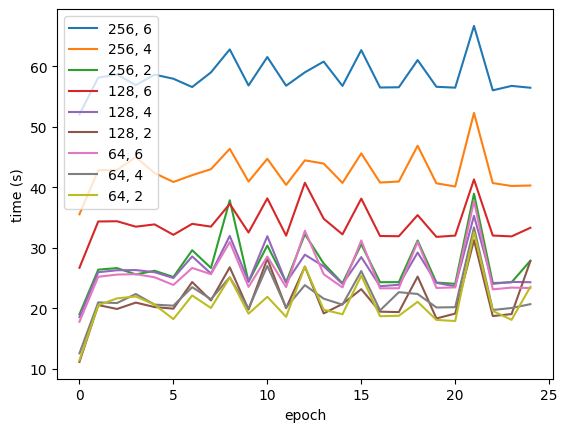

In [10]:
df.plot()
plt.xlabel("epoch")
plt.ylabel("time (s)");

In [11]:
mean_time

256, 6    58.319481
256, 4    42.567708
256, 2    27.177615
128, 6    33.977045
128, 4    26.210895
128, 2    21.628545
64, 6     25.865768
64, 4     21.816219
64, 2     20.796273
Name: mean_time (s), dtype: float64

## HydroNet (4.5m)

In [12]:
df, mean_time = sweep_dataframe("hatemh/hydronet-large-model-arch/sweeps/3ufn9a3g")
df

/tmp/ipykernel_13281/2766317389.py:20: UserWarning: Skipping crashed run
{'k': 28, 'seed': 0, 'task': 'Task.train', 'cutoff': 6, 'module': 'BenchModule.schnet_fss', 'dataset': 'BenchDataset.hydronet', 'use_wandb': True, 'batch_size': 12, 'num_epochs': 25, 'max_workers': 29, 'profile_dir': None, 'use_packing': True, 'model_params': 'ModelParams(num_features=512, num_interactions=6, num_gaussians=25, cutoff=6.0)', 'num_features': 512, 'num_io_tiles': 0, 'learning_rate': 0.001, 'num_gaussians': 25, 'combined_batch': 'CombinedBatch(model_batch_size=2, device_iterations=4, replication_factor=16, gradient_accumulation=64)', 'prefetch_depth': 3, 'synthetic_data': False, 'merge_all_reduce': True, 'num_interactions': 6, 'use_async_loader': True, 'model_params.num_features': 512, 'available_memory_proportion': None, 'model_params.num_interactions': 6} 
  warn(f"Skipping crashed run\n{run.config} ")
/tmp/ipykernel_13281/2766317389.py:20: UserWarning: Skipping crashed run
{'k': 28, 'seed': 0, 'tas

,"128, 2","512, 2","256, 6","256, 4","256, 2","128, 6","128, 4","64, 6","64, 4","64, 2"
0,28.704785,74.615530,97.109953,66.026126,37.637764,56.268060,39.255137,38.762215,29.828823,28.695023
1,38.390632,78.457230,100.079197,69.780537,47.892963,60.023721,45.626261,45.672985,40.696351,38.495312
2,38.522758,78.474055,99.949941,70.172839,49.037249,60.219809,48.764668,45.756382,42.704251,41.485094
3,45.079555,78.833259,100.116111,72.043570,49.485569,61.227167,49.883092,50.078206,44.600350,41.760298
4,42.526101,80.179276,100.191343,69.815734,46.903277,60.269740,47.750544,46.455084,50.545597,45.010291
5,35.159074,78.474637,99.929736,69.804712,40.958998,60.290546,43.512842,43.178504,44.975408,34.460921
6,39.678705,82.711270,104.564219,73.042561,47.555227,67.226904,50.798383,44.439762,37.727517,42.275926
7,45.387775,84.681461,99.893039,69.781522,51.662536,60.073485,52.299920,51.539741,51.280192,50.389032
8,35.104083,78.014541,100.153891,69.518069,45.699733,60.465443,43.316407,42.633127,42.356578,35.704704
9,46.801893,80.511432,102.776106,72.702417,49.454247,71.958997,57.734143,51.475513,43.193679,52.887881


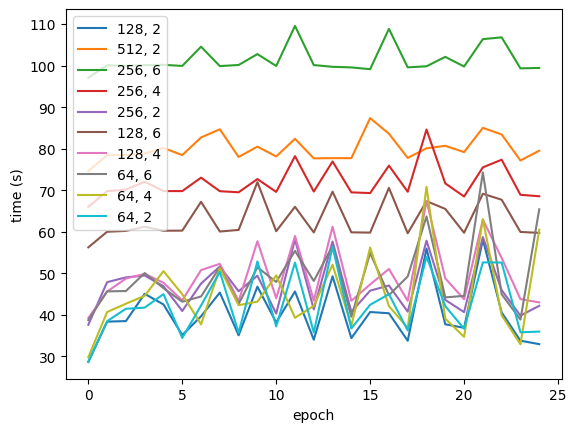

In [13]:
df.plot()
plt.xlabel("epoch")
plt.ylabel("time (s)");

In [14]:
mean_time

128, 2     40.320436
512, 2     80.103876
256, 6    101.398124
256, 4     71.867517
256, 2     46.687230
128, 6     62.918684
128, 4     49.415466
64, 6      49.306430
64, 4      44.989731
64, 2      42.544259
Name: mean_time (s), dtype: float64